In [9]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
!python -m visdom.server

^C


In [13]:
!start http://localhost:8097/

In [14]:
!python train.py --dataroot ./datasets/gif/ --name gif_64 --no_flip --norm batch --model vec2pic --dataset_mode vec2pic --load_size 64 --crop_size 64 --sig 0.1 --netD_pic n_layers --n_layers_D 3 --display_freq 5 --n_epochs 200 --lr 1e-5 --netG ffnet_n_layers --n_layers_G 15

^C


In [15]:
!python create_test.py --dataroot ./datasets/gif/ --name gif_test_x32! --no_flip --norm batch --norm batch --model vec2pic --dataset_mode vec2pic --load_size 32 --crop_size 32 --netG ffnet_n_layers --n_layers_G 15 --batch_size 280 --no_flip --gpu_ids -1

----------------- Options ---------------
               batch_size: 280                           	[default: 32]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 32                            	[default: 64]
                 dataroot: ./datasets/gif/               	[default: None]
             dataset_mode: vec2pic                       	[default: vec]
                direction: AtoB                          
              display_env: main                          
             display_freq: 0                             
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: la

D:\MFCGAN\models\base_model.py:192: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(load_path, map_location=str(self.device))
Traceback (most recent ca

In [10]:
import os
import torch
# define a function to load the model and dataset from dir
def load_model_and_dataset(dir):
    G_A = torch.load(os.path.join(dir, 'netG_A.pth'))
    G_B = torch.load(os.path.join(dir, 'netG_B.pth'))
    dataset = torch.load(os.path.join(dir, 'dataset.pth'))
    return G_A, G_B, dataset

In [11]:
G_A, G_B, dataset = load_model_and_dataset('./results/gif_64/')
import numpy as np
import matplotlib.pyplot as plt


C:\Users\wende\AppData\Local\Temp\ipykernel_19304\1977099603.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  G_A = torch.load(os.path.join(dir, 'netG_A.pth'))
C:\Users\w

In [12]:
import re
import numpy as np
import matplotlib.pyplot as plt

def get_numbers_after_backslash(input_string):
    numbers = re.findall(r'\\(\d+)', input_string)
    return numbers

In [13]:
for batch in dataset:
        pass

images_tensor = batch['B']
images_names = batch['B_paths']

images_index = [get_numbers_after_backslash(name)[0] for name in images_names]
images_index = [int(i) for i in images_index]
images_order = np.argsort(images_index)
images_tensor = images_tensor[images_order]
unique_index = [i*20 for i in range(14)]


images_tensor = images_tensor[unique_index]
n = images_tensor.size(0)
images = images_tensor.reshape(n, 64, 64).detach().numpy()
print(images.shape)

(14, 64, 64)


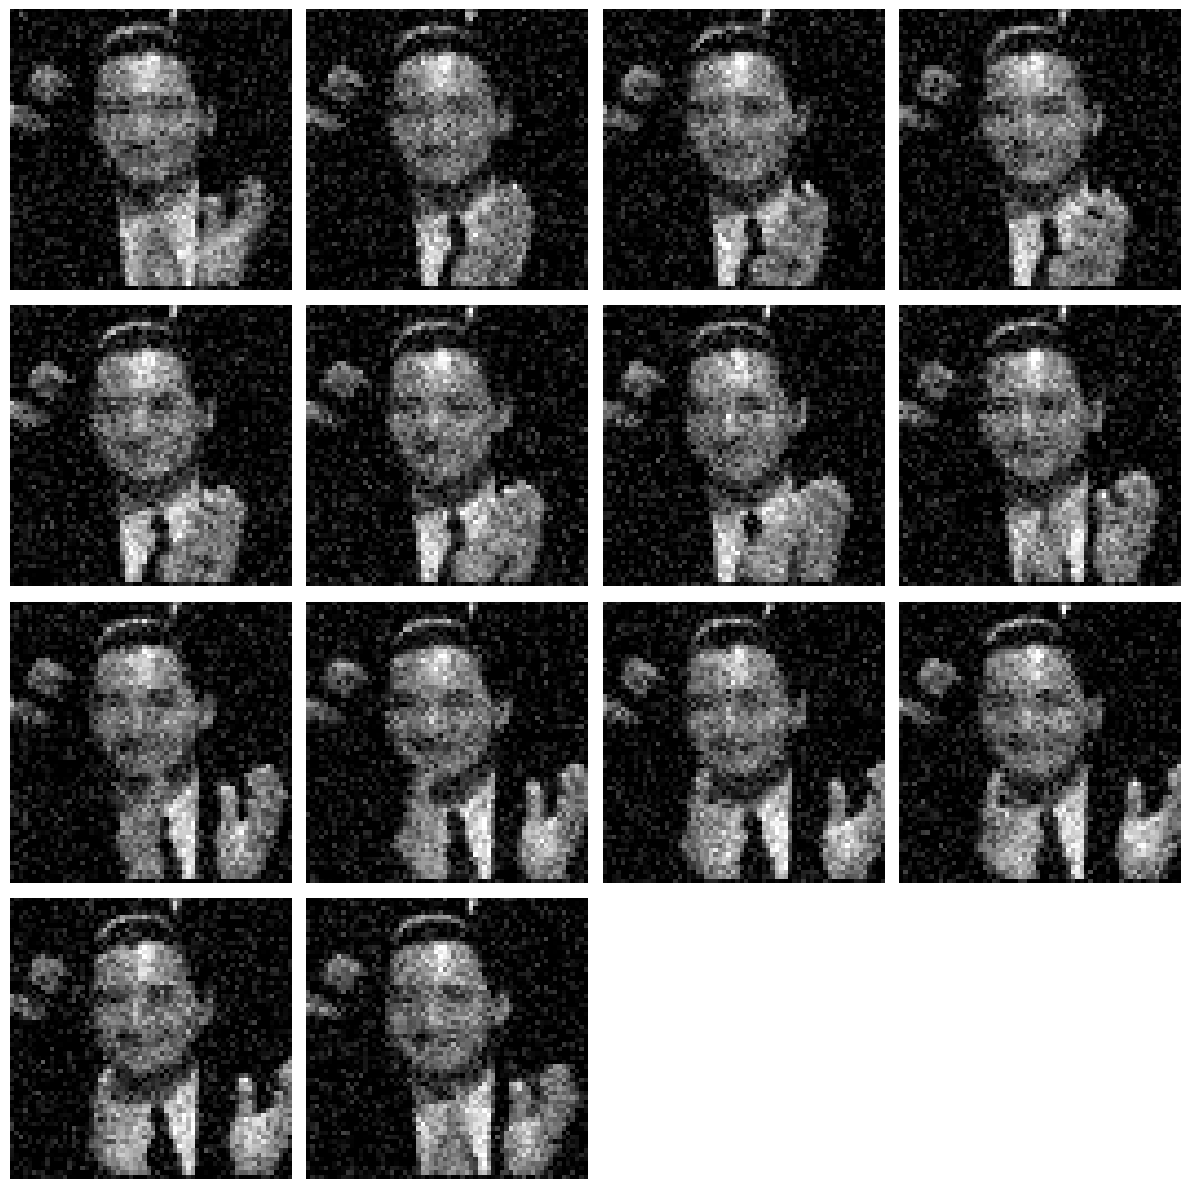

In [18]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.flatten()
for i in range(14):
    ax = axes[i]
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')
    
if len(axes) > 14:
    for j in range(14, len(axes)):
        fig.delaxes(axes[j])

fig.tight_layout()
plt.show()


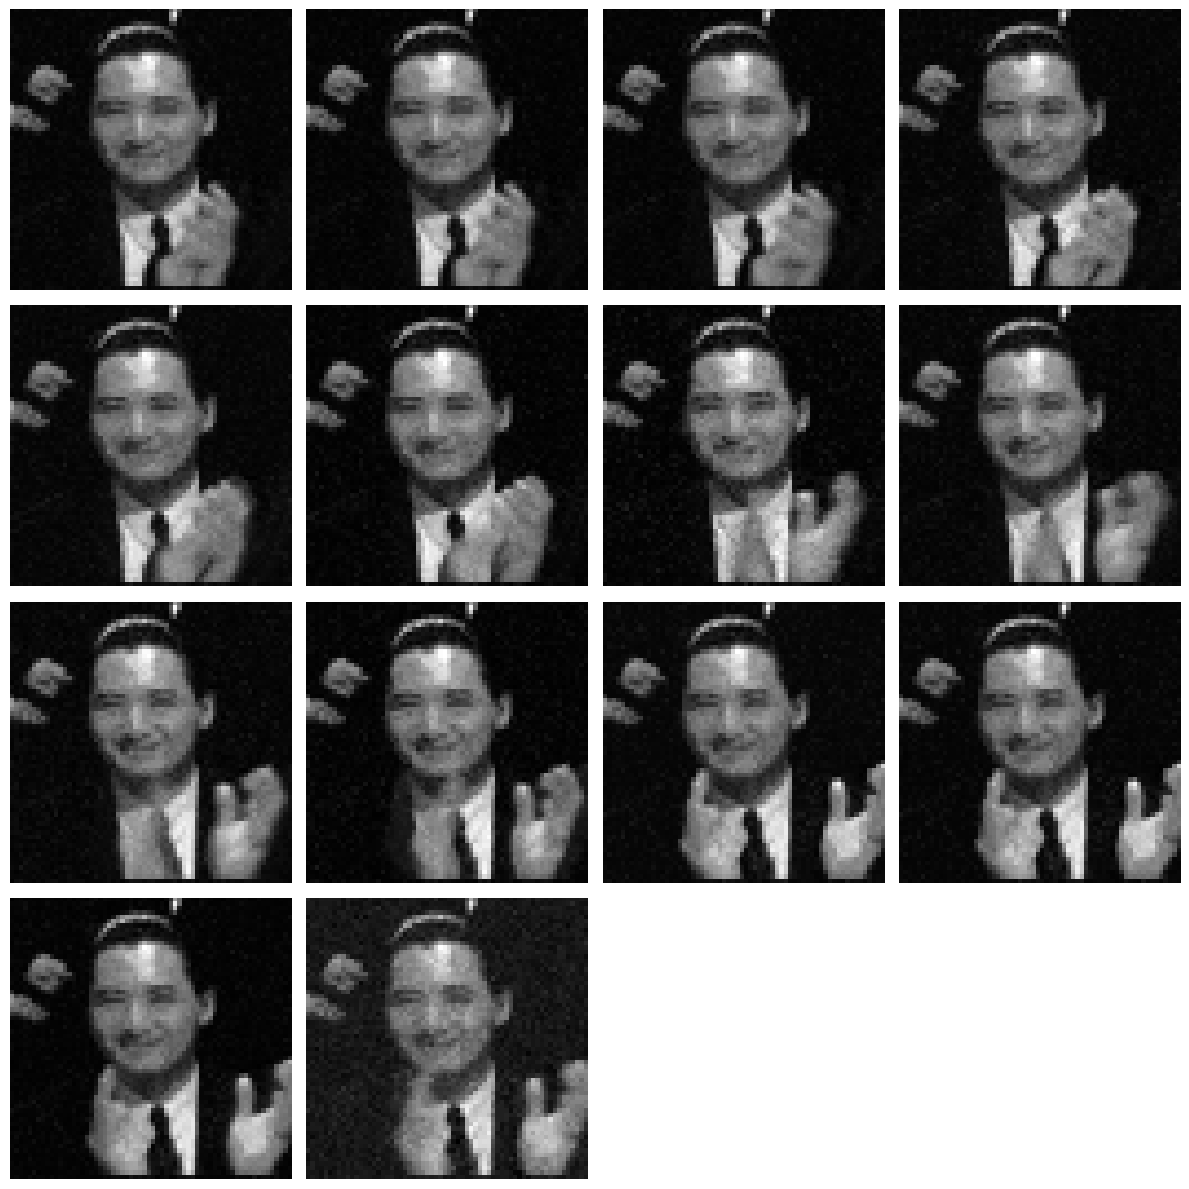

In [21]:
from PIL import Image
Codes = G_B(images_tensor)
GG_images = G_A(Codes)
GG_images = GG_images.reshape(14, 64, 64).detach().numpy()
order = np.argsort(Codes.detach().numpy()[:, 0])
ordered_images = GG_images[order]


fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.flatten()
for i in range(14):
    ax = axes[i]
    ax.imshow(ordered_images[i], cmap='gray')
    ax.axis('off')
     # Normalize each image individually to [0, 1] before scaling to [0, 255]
    img_normalized = (ordered_images[i] - ordered_images[i].min()) / (ordered_images[i].max() - ordered_images[i].min())
    img = (img_normalized * 255).astype(np.uint8)  # Scale to [0, 255] and convert to uint8
    img = Image.fromarray(img)
    img.save(f"image_{i}.png")  # Save each image with a unique filename
if len(axes) > 14:
    for j in range(14, len(axes)):
        fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

14


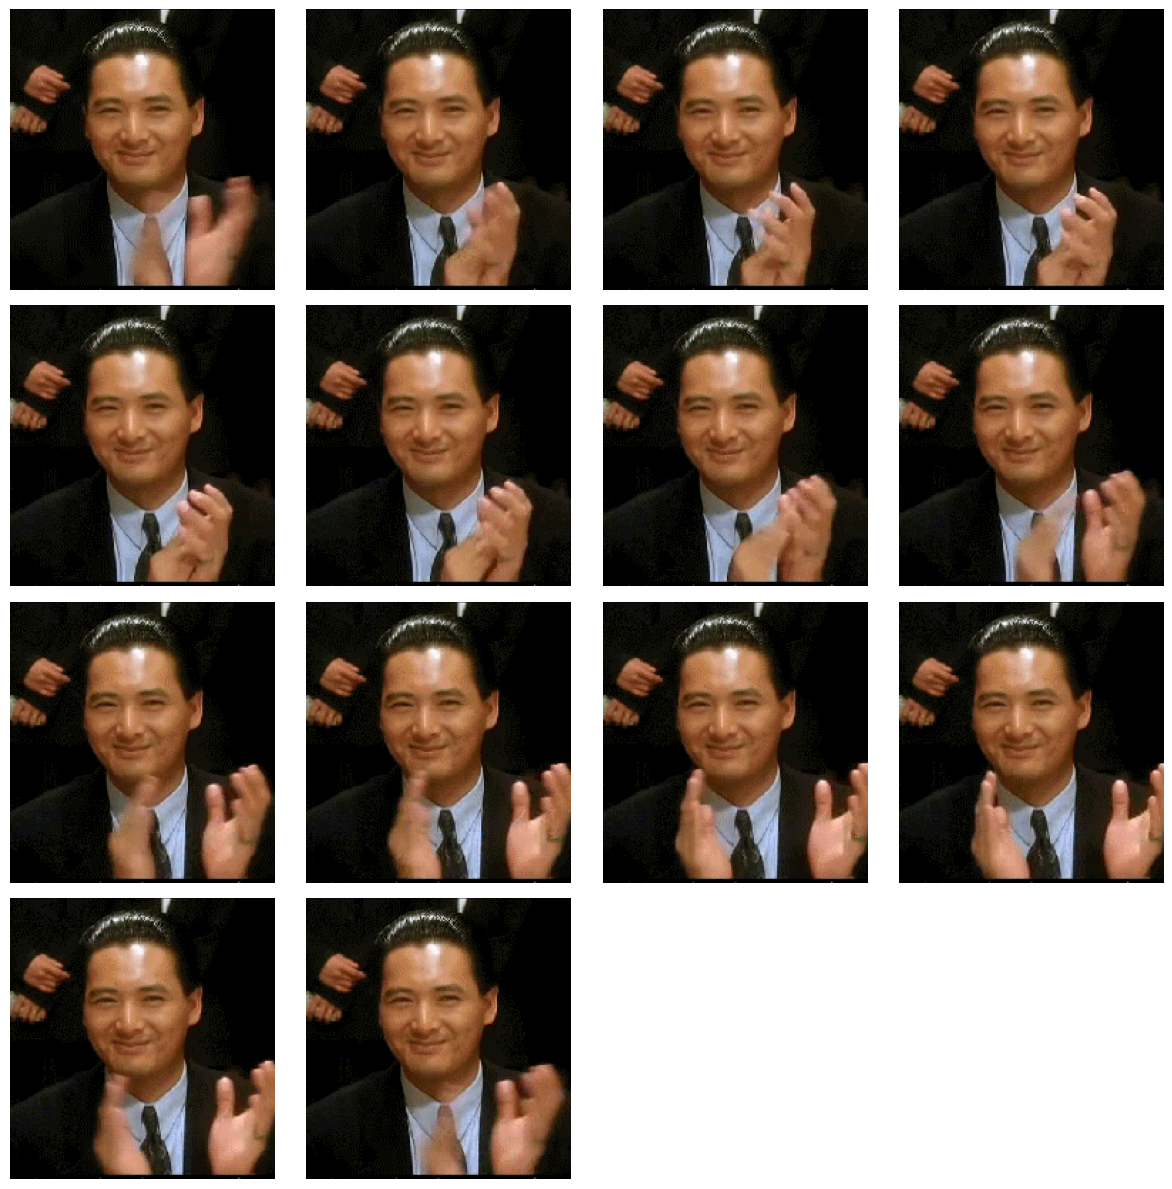

In [18]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set the directory containing the GIF images
dir_path = 'Create_real_data/1/frames/'

# Get a list of all files in the directory
file_list = os.listdir(dir_path)

# Filter the file list to include only GIF images
gif_files = [Image.open(os.path.join(dir_path,str(i)+'.gif')).convert('RGB') for i in range(14)]
print(len(gif_files))

fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.flatten()
for i in range(14):
    ax = axes[i]
    ax.imshow(gif_files[i])
    ax.axis('off')
if len(axes) > 14:
    for j in range(14, len(axes)):
        fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

